In [13]:
from pathlib import Path

import torch
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision.transforms as T
import rasterio as rio
from rasterio.plot import show

ROOT_DIR = Path().cwd().parent

DATA_DIR = ROOT_DIR / 'data' / 'raw'

In [5]:
def img_loader(path: str):
    with rio.open(path) as src:
        array = src.read(out_dtype="int16")
        
    return torch.from_numpy(array)

In [6]:
data_transform = T.Compose([
    T.Resize(size=(250, 250))
])

In [7]:
data = datasets.DatasetFolder(
    root=ROOT_DIR / 'data' / 'raw',
    loader=img_loader,
    extensions=['.tif'],
    transform=data_transform
)

In [8]:
data_loader = DataLoader(data, shuffle=False, batch_size=1)

In [9]:
for i in range(1):
    x, y = next(iter(data_loader))

/Users/dk/miniconda3/envs/wust-remote-sensing/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/Users/dk/miniconda3/envs/wust-remote-sensing/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(an

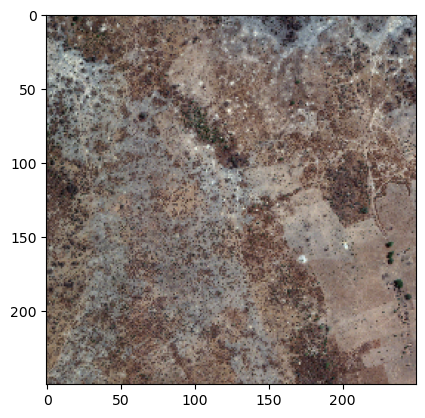

<Axes: >

In [19]:
show(x[0].numpy(), adjust=True)